<a href="https://colab.research.google.com/github/shubhambhunia4/ML-Lab-Codes/blob/main/SVM_Cancer(Q_9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    jaccard_score, confusion_matrix, roc_curve, auc
)

In [ ]:
data = pd.read_csv("samples_cancer.csv")

In [ ]:
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [ ]:
# Check for null values
print("\nMissing values in each column:\n", data.isnull().sum())


Missing values in each column:
 ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64


In [ ]:
#Preprocessing of Data
label_encoder = LabelEncoder()
data['Class'] = label_encoder.fit_transform(data['Class'])

# Separate features (X) and target (y)
X = data.drop(columns=['Class', 'ID']) # Dropping 'ID' as well as it's not a feature
y = data['Class']

# Handle non-numeric values in 'BareNuc'
X['BareNuc'] = X['BareNuc'].replace('?', np.nan)
X['BareNuc'] = pd.to_numeric(X['BareNuc'])

# Impute missing values with the mean
X['BareNuc'] = X['BareNuc'].fillna(X['BareNuc'].mean())


# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


----- SVM with LINEAR Kernel -----
Accuracy       : 0.9571
Recall         : 0.9375
Precision      : 0.9375
F1-Score       : 0.9375
Jaccard Score  : 0.8824
Error Rate     : 0.0429
Confusion Matrix:
[[89  3]
 [ 3 45]]

----- SVM with POLY Kernel -----
Accuracy       : 0.9500
Recall         : 0.8750
Precision      : 0.9767
F1-Score       : 0.9231
Jaccard Score  : 0.8571
Error Rate     : 0.0500
Confusion Matrix:
[[91  1]
 [ 6 42]]

----- SVM with RBF Kernel -----
Accuracy       : 0.9571
Recall         : 0.9375
Precision      : 0.9375
F1-Score       : 0.9375
Jaccard Score  : 0.8824
Error Rate     : 0.0429
Confusion Matrix:
[[89  3]
 [ 3 45]]

----- SVM with SIGMOID Kernel -----
Accuracy       : 0.9643
Recall         : 0.9583
Precision      : 0.9388
F1-Score       : 0.9485
Jaccard Score  : 0.9020
Error Rate     : 0.0357
Confusion Matrix:
[[89  3]
 [ 2 46]]


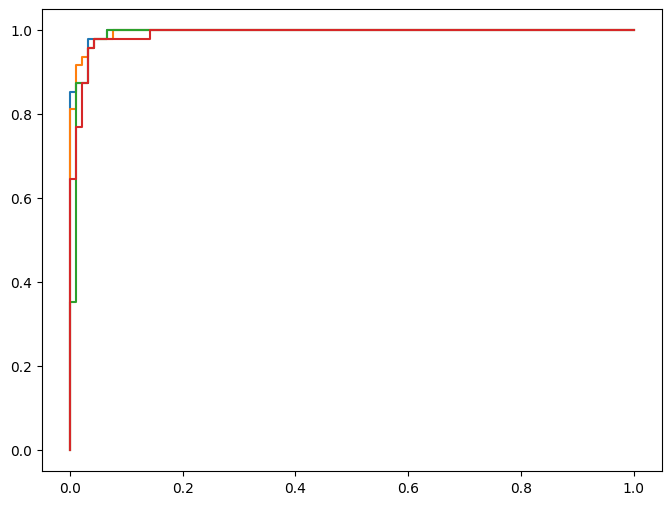

In [ ]:
#  Training and Evaluation of SVM Models
# -------------------------------
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

plt.figure(figsize=(8, 6))

for kernel in kernels:
    print(f"\n----- SVM with {kernel.upper()} Kernel -----")

    # Create and train the model
    model = SVC(kernel=kernel, probability=True, random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    jacc = jaccard_score(y_test, y_pred)
    err_rate = 1 - acc
    cm = confusion_matrix(y_test, y_pred)

    results[kernel] = {
        "Accuracy": acc,
        "Recall": rec,
        "Precision": prec,
        "F1-Score": f1,
        "Jaccard Score": jacc,
        "Error Rate": err_rate,
        "Confusion Matrix": cm
    }

    # Printing  individual results
    print(f"Accuracy       : {acc:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"F1-Score       : {f1:.4f}")
    print(f"Jaccard Score  : {jacc:.4f}")
    print(f"Error Rate     : {err_rate:.4f}")
    print(f"Confusion Matrix:\n{cm}")

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{kernel.upper()} (AUC = {auc(fpr, tpr):.2f})")


/tmp/ipython-input-547078743.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


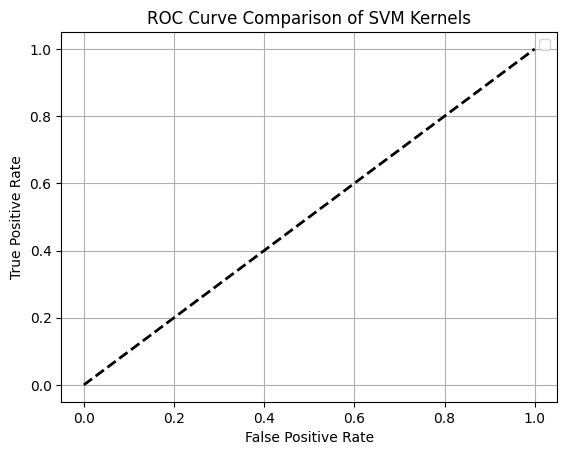


===== COMPARISON SUMMARY =====
         Accuracy    Recall Precision  F1-Score Jaccard Score Error Rate
linear   0.957143    0.9375    0.9375    0.9375      0.882353   0.042857
poly         0.95     0.875  0.976744  0.923077      0.857143       0.05
rbf      0.957143    0.9375    0.9375    0.9375      0.882353   0.042857
sigmoid  0.964286  0.958333  0.938776  0.948454      0.901961   0.035714


In [ ]:
# 4. Plot ROC Curve Comparison
# -------------------------------
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("ROC Curve Comparison of SVM Kernels")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# 5. Display Results Summary
# -------------------------------
print("\n===== COMPARISON SUMMARY =====")
summary = pd.DataFrame(results).T
print(summary.drop(columns=['Confusion Matrix']))

In [ ]:
# 5. Display Results Summary Table

import pandas as pd

print("\n===== COMPARISON SUMMARY TABLE =====\n")

# Convert dictionary of results to DataFrame
summary = pd.DataFrame(results).T  # Transpose to make kernels as rows

# Drop the confusion matrix (since it's not scalar)
summary_display = summary.drop(columns=["Confusion Matrix"])

# Round the numbers for better readability
summary_display = summary_display.round(4)

# Print the final table
print(summary_display)

# Optional: Save the summary as CSV file for report
summary_display.to_csv("svm_comparison_summary.csv", index=True)
print("\nSummary table saved as 'svm_comparison_summary.csv'")



===== COMPARISON SUMMARY TABLE =====

         Accuracy    Recall Precision  F1-Score Jaccard Score Error Rate
linear   0.957143    0.9375    0.9375    0.9375      0.882353   0.042857
poly         0.95     0.875  0.976744  0.923077      0.857143       0.05
rbf      0.957143    0.9375    0.9375    0.9375      0.882353   0.042857
sigmoid  0.964286  0.958333  0.938776  0.948454      0.901961   0.035714

Summary table saved as 'svm_comparison_summary.csv'
